## Table of Contents

* Signal to Noise Ratio (SNR)

* Curse of Dimensionality

* Step by Step approach to conduct PCA

* Improving SNR via PCA

* Linear Algebraic Operations

* Example of Singular Value Decomposition

* Dimensionality Reduction

* Variable Reduction

* Factor Loading and how to choose the variables

* Can PCA to applied to every kind of data?

### Story Time

Let’s start by asking which radio station do you like to listen to? I like to listen to 104.8 FM (yes! the station which airs the love songs..! 🙂 Okay, so now once we tune into the FM at 104.8 frequency we are able to get the radio station of our choice. Also, if you have noticed if we tune the FM at a slightly higher frequency of say 105 or at a lower frequency of 104.5 we are still able to hear the radio station. However, something happens as we step away from the frequency of 104.8. Let me show this diametrically(直接地).

Now, as we move further away from the required FM frequency either on the higher side or on the lower side, we start to get unwanted signals i.e. the broadcast of the radio gets jumbled up with the noise. In other words, we get the maximum volume or the amplitude of our needed station at that particular frequency of 104.8 but the volume of the channel drops as we diverge from 104.8. This leads us to the concept of noise and signal.

In Statistics, the signal of interest to us or the information present is stored in the spread (or the variance) of the data. In our example, the frequencies are the information that we need. This is also known as the Signal to Noise Ratio.

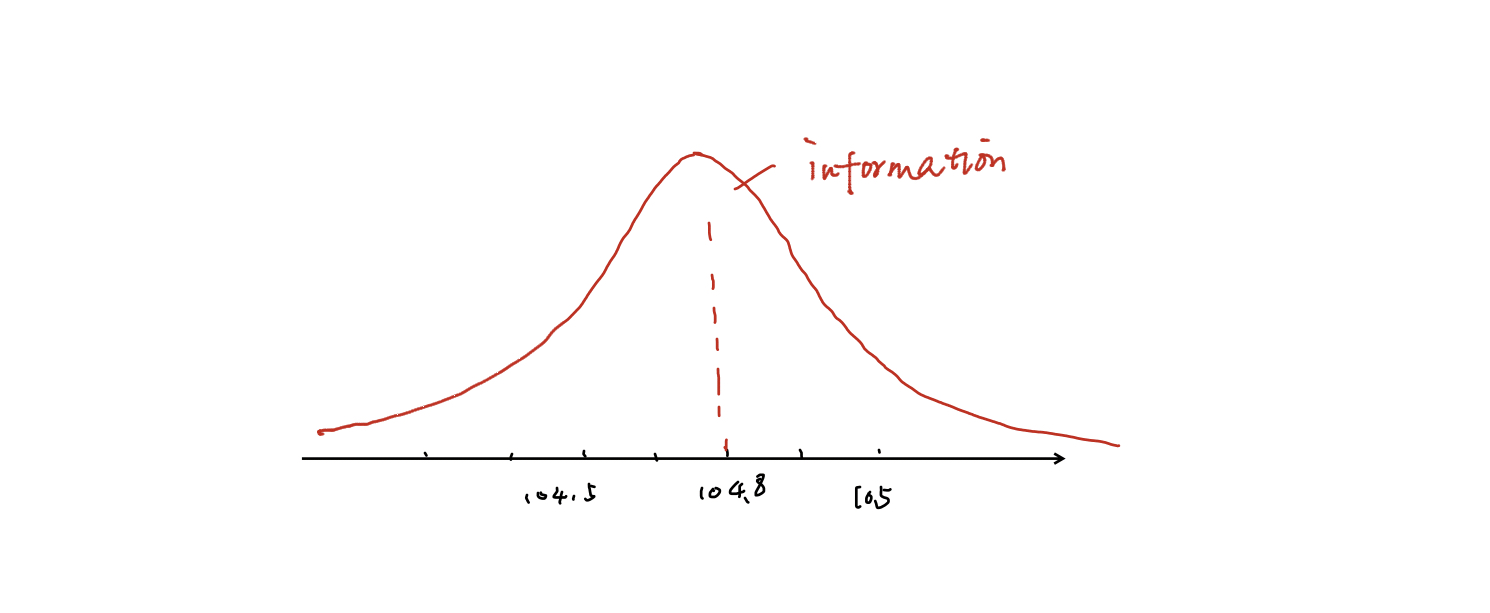

### Signal to Noise Ratio (SNR)

We have a mathematical space consisting of two dimensions $x_1$ and $x_2$ and the data between these two dimensions is scattered as shown below.

When we look at the space from the point of view of $x_1$ only then the amount of spread ranges between $x_1\text{min}$ and $x_1\text{max}$, that is the information content captured by $x_1$. And, seeing the data from $x_2$ the signal or amount of spread expressed by $x_2$ dimension ranges from $x_2\text{min}$ and $x_2\text{max}$.

On analyzing this data together by considering both $x_1$ and $x_2$, we see there is a larger spread containing information about how $x_1$ and $x_2$ influence each other. When seeing the data from $x_1$ 's point of view then the data present in the other dimension that is the spread or the vertical lift in the data points is only noise for $x_1$ cause $x_1$ is unable to explain this variation. Similarly, the vertical lift in the data points is also noise from $x_2$'s view as $x_2$ also cannot explain this spread either.

Therefore, on putting the data points present in both the dimensions together we see there is covariance present in the mathematical space that shows that $x_1$ and $x_2$ influence each other. 

Hence, the signal is all the valid values for a variable ranging between its respective min and max values and the noise represented by the spread of the data points across the best fit line. This unexplained variation in the data is due to random factors.

The objective of PCA is to maximize or increase this signal content and reduce the noise content in the data.

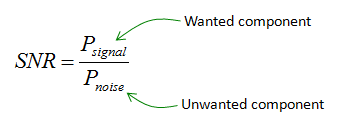

Now, shifting the gears towards understanding the other purpose of PCA.

### Curse of Dimensionality

When building a model with $Y$ as the target variable and this model takes two variables as predictors $x_1$ and $x_2$ and represent it as:

$$Y = f(X_1, X_2)$$

In this case, the model which is $f$, predicts the relationship between the independent variables $x_1$ and $x_2$ and the dependent variable(因变量) $Y$. On building this model using any of the algorithms available, we are essentially feeding $x_1$ and $x_2$ as the inputs to the algorithm. What this means is that this algorithm gets its input from the information content present in the $x_1$ variable and the information content present in the $x_2$ variable as the two parameters.

All the algorithms assume that these parameters which make the mathematical two-dimensional space along with the target variable are independent of each other, that is $x_1$ and $x_2$ do not have an influence on each other. $Y$ is strongly dependent on $X_1$ and $X_2$ respectively. This assumption of $X_1$ and $X_2$ being independent of each other is often violated(侵犯) in reality.

When $X_1$ and $X_2$ are dependent on each other, then these variables end up interacting with each other. In other words, there is a correlation(相关性) present amongst them. When two independent variables are very strongly interacting with each other, that is the correlation coefficient is close to 1 then we are providing the same information to the algorithm in two dimensions, which is nothing but redundancy. This unnecessarily increases the dimensionality of the features of the mathematical space. When we have too many dimensions more than required then we are exposing ourselves to the **Curse of Dimensionality**.

The impact of having more dimensions in the model, which is nothing but having multicollinearity(多重线性) in the data can lead to overfitting, and this exposes(暴露) the model to have variance errors, that is the model may fail to perform or predict for new unseen data.

PCA also helps to reduce this dependency or the redundancy between the independent dimensions.

We shall see in detail later how PCA helps to reduce this redundancy in the dimensions. Having seen what PCA is, its purpose let’s now explore how PCA works along with the mathematics involved in it.

### Step by Step Approach to conduct(执行) PCA

What PCA does is, it essentially rotates the coordinate axes, in a such way that axis captures almost all the information content or the variance. The clip below visually depicts(描绘) it. We’ll go step by step to see how this is achieved.

We saw above that the two independent parameters $X_1$ and $X_2$ are fed into the model. In Python implementation, we shall do it using $\text{model.fit}(x_1, x_2)$. As we know by now, that the model is only capturing the individual respective information available in the predictors and not the joint spread(联合) which is far richer as it tells how these two variables vary together. This with each other is captured in the model till yet and the covariance(协方差).

The aim of PCA is to **capture this covariance information** and supply it to the algorithm to build the model. We shall look into the steps involved in the process of PCA.

#### Step1: Standardizing the independent variables

When we apply Z-score to the data, then we are essentially centering the data points to the origin. What do we mean by centering the data?

From the above FM frequencies chart, let’s say 104.8 is the central value i.e the average or the mean value represented by $\bar{x}$ and other frequencies are $x_i$ values. On converting these $x_i$ values to Z-score, where $Z = (x_i – \bar{x})/\text{standard deviation}$

Post this standardization, all the frequencies (data points) that were on the higher side of the average of 104.8 became positive values and all the frequencies that were on the lower side of the average of 104.8 became negative values. This is known as centering.

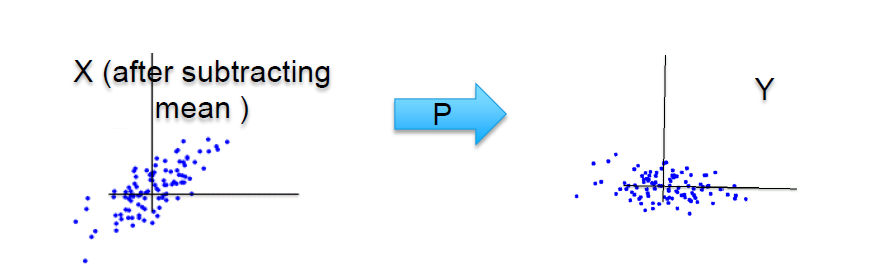

**Implementation of PCA in python**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# to suppress(抑制) the warnings:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# loading the iris dataset
iris = datasets.load_iris()
X = iris.data

In [3]:
X.shape

(150, 4)

$X=
\left[
\begin{matrix}
 {x^{(1)}}^T      \\
 \vdots  \\
 {x^{(150)}}^T
\end{matrix}
\right]
$, 其中 $x_i=
\left[
\begin{matrix}
 x^{(i)}_1    \\
 \vdots  \\
 x^{(i)}_4
\end{matrix}
\right]$

### PCA的两种实现方法

#### 1.基于特征值分解协方差矩阵实现PCA算法

**Steps invovled in PCA**

- 1) Standardize the data

- 2) Calculate the covariance matrix

- 3) Calculate the eigenvectors and the eigenvalues of the covariance matrix

- 4) Rank the eigenvectors by its corresponding eigenvalues and obtain the principal components with its column vectors corresponding to the top k eigenvectors

**Step 1: Normalize the data**

First step is to normalize the data that we have so that PCA works properly. This is done by subtracting the respective means from the numbers in the respective column.
So if we have two dimensions X and Y, all X become 𝔁- and all Y become 𝒚-. This produces a dataset whose mean is zero.

In [5]:
X_std = StandardScaler().fit_transform(X)

In [8]:
X_std.shape

(150, 4)

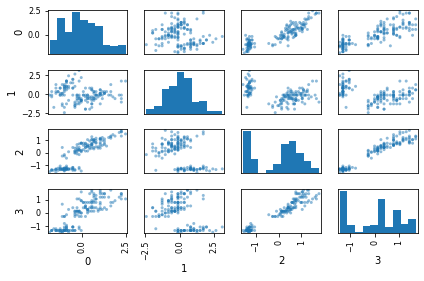

In [6]:
### Understanding the data using pair plot:
X_std_df = pd.DataFrame(X_std)
axes = pd.plotting.scatter_matrix(X_std_df)
plt.tight_layout()

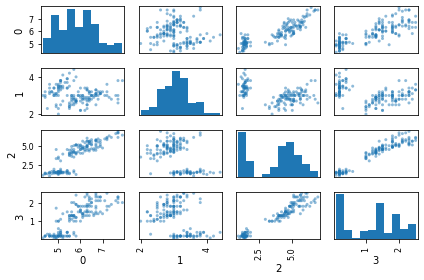

In [7]:
X_df = pd.DataFrame(X)
axes = pd.plotting.scatter_matrix(X_df)
plt.tight_layout()

#### Step2: Generating the covariance or correlation matrix for all dimensions

In this new mathematical space, we find the covariance between $x_1$ and $x_2$ and represent it in the form of a matrix and obtain something like below:

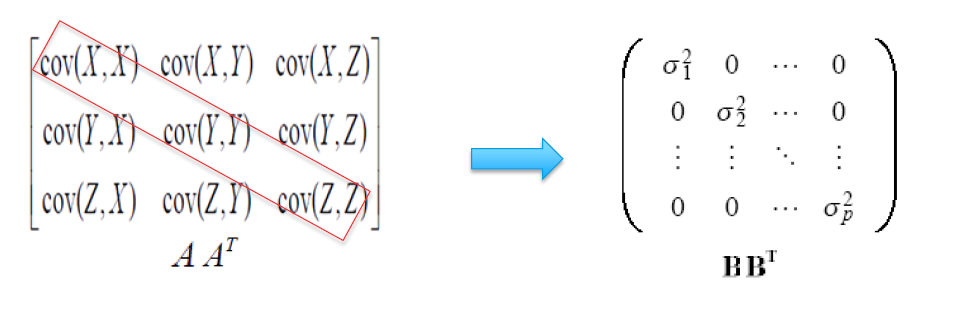

This matrix is the numerical representation of how much information is contained between the two-dimensional space of $X_1$ and $X_2$.

In the matrix, the elements on the diagonals are the variance or spread of $x_1$ with itself and of $x_2$ with itself implying how much information is contained within the variable itself. Hence, the diagonals will almost always be close to one as it shows how the variable behaves with self.

The degree of signal or information is indicated by the off-diagonal(非对角) elements. These indicate the correlation between $x_1$ and $x_2$ that is how these two interact or vary with each other. A positive correlation suggests a positively linear relationship and the negative correlation value represents a negative linear relationship. It is highly imperative to use this newly found information as an input for building our model.

In [9]:
cov_matrix = np.cov(X_std.T)
print(cov_matrix.shape)
print(f'Covariance Matrix \n {cov_matrix}') # 协方差矩阵一定是对称的

(4, 4)
Covariance Matrix 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


计算协方差矩阵 $\frac{1}{n}X^T X$, $X=
\left[
\begin{matrix}
 {x^{(1)}}^T      \\
 \vdots  \\
 {x^{(150)}}^T
\end{matrix}
\right]
$

In [14]:
cov_matrix_2 = X_std.T.dot(X_std)/150
print(cov_matrix_2)

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


The diagonals in the pair plot show how the variables behave with themselves and the off-diagonal shows the relationship between the two variables in the same manner as it was for the covariance matrix. On this covariance matrix, we apply the eigenfunction, which is a linear algebra function. The dimensions are transformed using this algebra into a new set of dimensions.

On applying the eigenfunction, what conceptually happens is that mathematical space is rotated. The transformation is a rotation of axes in a mathematical space and identifies new dimensions.

#### Step3: Eigen Decomposition (特征分解)--Calculate the eigenvalues and eigenvectors

During this process, we get two outputs as below:

- 1.Eigen Vectors: These are the new dimensions of the new mathematical space, and

- 2.Eigenvalues: This is the information content of each one of these eigenvectors. It is the spread or the variance of the data on each of the eigenvectors.

We shall look at the meaning and the mathematics of these outputs of eigenvectors and the eigenvalues and how the axes absorb(吸收) all the signals in detail below.

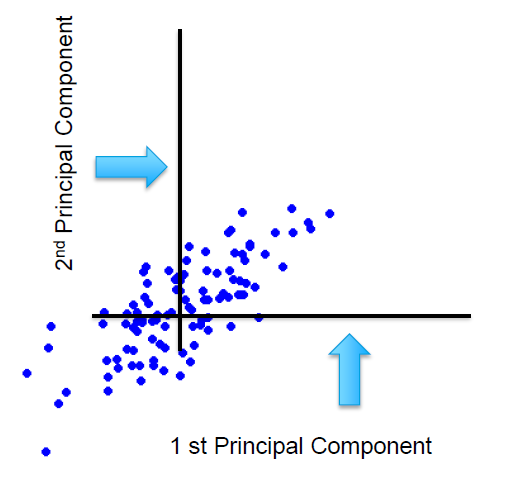

In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(len(eig_vals))
print(eig_vecs.shape)

4
(4, 4)


In [11]:
print(f'Eigen Vectors is {eig_vecs}')
print(f'Eigen Values is {eig_vals}')

Eigen Vectors is [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigen Values is [2.93808505 0.9201649  0.14774182 0.02085386]


These eigenvectors are nothing but the principal components. These are the directions in the original mathematical space where the maximum spread is captured. The spread is the signal or information content.

#### Step4: Sort the Eigenvectors corresponding to their respective eigenvalues

对特征值从大到小排序，选择其中最大的$k$个。然后将其对应的$k$个特征向量分别作为行向量组成特征向量矩阵 $P$。 将数据转换到 $k$ 个特征向量构建的新空间中，即 $Y=PX$。

In [17]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs_sorted = sorted(eigen_pairs, reverse=True)

In [18]:
eigen_pairs_sorted

[(2.9380850501999936,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624856,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494774,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.02085386217646263,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

PCA有两种通俗易懂的解释：(1)最大方差理论；(2)最小化降维造成的损失。这两个思路都能推导出同样的结果。下面用的是最大方差理论

In [20]:
# Cumulative Variance Explained:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


In [24]:
k = len(cum_var_exp[cum_var_exp<96])

In [26]:
# select the top k eig_vec
feature=np.array([ele[1] for ele in eigen_pairs_sorted[:k]])

In [27]:
feature

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [-0.37741762, -0.92329566, -0.02449161, -0.06694199]])

In [29]:
X = np.dot(X_std, np.transpose(feature))
print(X.shape)

(150, 2)


此时X为降维后的数据

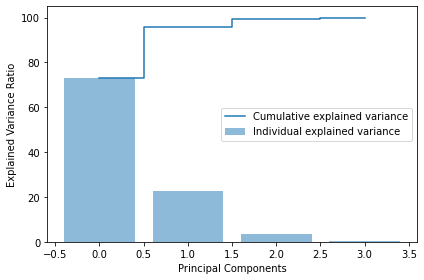

In [21]:
# Summary Plot of the cumulative Variance Explained:

plt.figure(figsize=(6 , 4))
plt.bar(range(4), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Improving SNR via PCA

The amount of spread each eigenvector captures or in other words the variance across in each of the eigenvectors is expressed in the eigenvalues. So, in our two-dimensional space, the eigenvector E1 has an associated eigenvalue, ev1, and eigenvector E2 has another associated eigenvalue, ev2.

In the original space, we had two dimensions $x_1$ and $x_2$, and hence will get two eigenvectors. The number of eigenvectors or principal components (or the new dimensions) will always be equal to the number of dimensions in the original space. Each of these eigenvectors will be orthogonal meaning will be at 90 degrees to each other. It is beyond our imagination and the scope of the article to visually depict how the components are at 90 degrees to each other for the higher dimensional space. 

In the graph below, we can see that the eigenvectors, which are represented on the axis, contain all the information and there are no data points (or there are zero signals) in the mathematical space other than the axes. All the information is captured in the eigenvector E1 or E2.

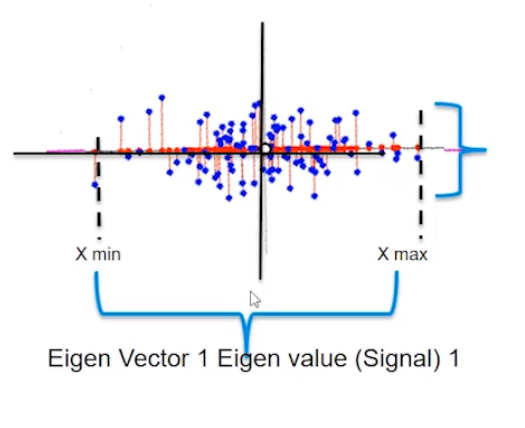

This shows that the diagonal elements having a value of 1, explains all the information present in the data, and the off-diagonal elements, theoretically with the value of zero depict that there is no signal or information content. In reality, the off-diagonal elements will be close to zero and not exactly zero.

The original data points are now represented by the red dots on the new dimensions.

Now, let's get our hands dirty by digging into the mathematics behind PCA.

### Linear Algebraic Operations for PCA

PCA is basically one type of Singular Value Decomposition (SVD奇异值分解). In simpler terms, what it means that we are breaking or decomposing a larger value (i.e. a singular value) into smaller values. With reference to our context, we had divided our covariance matrix (the larger singular value) which was obtained post scaling of the independent variables into two outputs above the eigenvectors (into smaller values) and got their respective eigenvalues.

That’s pretty much what SVD is however, mathematically it can be a daunting(艰巨的) task. For our purpose here, we will look into the bare minimum mathematical operations required to understand the workings of PCA.

Any matrix let’s say, A of dimension $m \times n$, where $m$ is the number of rows and $n$ is the number of columns:

$$A_{m\times n}=U_{m\times m}S_{m\times n}V_{n\times n}^T$$

Can be further decomposed into the following way:

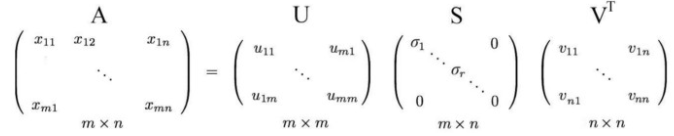

where $U$ and $V$ as the orthogonal matrices(正交矩阵) with orthonormal eigenvectors chosen from $AA^T$ and $A^TA$ respectively. $S$ is a diagonal matrix with $r$ elements equal to the root of the positive eigenvalues of $AA^T$ or $A^TA$ (both the matrices have the same positive eigenvalues anyway)

The diagonal elements are composed of singular values. In short, S is a diagonal matrix with positive values and is called a Singular matrix.

Don’t worry we shall look at what these greek terms do with an example below. Firstly, we need to understand the following two properties of the matrices:

- 1. Orthogonal Matrix 

$U\cdot V = 0$ In statistical terms, two matrices are orthogonal means these matrices are independent of each other and determinant is 1.

**Spectral Theorem:**

**Every symmetric matrix has the factorization $A=Q\Lambda Q^{-1}=Q\Lambda Q^T$ with $Q^{-1}=Q^T$**

#### 2. 基于SVD分解协方差矩阵实现PCA算法

1) 去平均值，即每一位特征减去各自的平均值。

2) 计算协方差矩阵。

3) 通过SVD计算协方差矩阵的特征值与特征向量。

4) 对特征值从大到小排序，选择其中最大的k个。然后将其对应的k个特征向量分别作为列向量组成特征向量矩阵。

5) 将数据转换到k个特征向量构建的新空间中。

在PCA降维中，我们需要找到样本协方差矩阵 $XX^T$ 的最大$k$个特征向量，然后用这最大的$k$个特征向量组成的矩阵来做低维投影降维。可以看出，在这个过程中需要先求出协方差矩阵$XX^T$,当样本数多、样本特征数也多的时候，这个计算还是很大的。当我们用到SVD分解协方差矩阵的时候，SVD有两个好处：

1) 有一些SVD的实现算法可以先不求出协方差矩阵 $XX^T$ 也能求出我们的右奇异矩阵V。也就是说，我们的PCA算法可以不用做特征分解而是通过SVD来完成，这个方法在样本量很大的时候很有效。实际上，scikit-learn的PCA算法的背后真正的实现就是用的SVD，而不是特征值分解。

2) 注意到PCA仅仅使用了我们SVD的左奇异矩阵，没有使用到右奇异值矩阵，那么右奇异值矩阵有什么用呢？

假设我们的样本是$m\times n$的矩阵$X$，如果我们通过SVD找到了矩阵$XX^T$最大的$k$个特征向量组成的$k\times n$的矩阵 $V^T$ ,则我们可以做如下处理：

$$X_{m\times k}'=X_{m\times n} V_{n\times k}^T$$

可以得到一个 $m\times k$ 的矩阵 $X'$,这个矩阵和我们原来 $m\times n$ 的矩阵 $X$ 相比，列数从 $n$ 减到了 $k$，可见对列数进行了压缩。也就是说，左奇异矩阵可以用于对行数的压缩；右奇异矩阵可以用于对列(即特征维度)的压缩。这就是我们用SVD分解协方差矩阵实现PCA可以得到两个方向的PCA降维(即行和列两个方向)。

### Summary

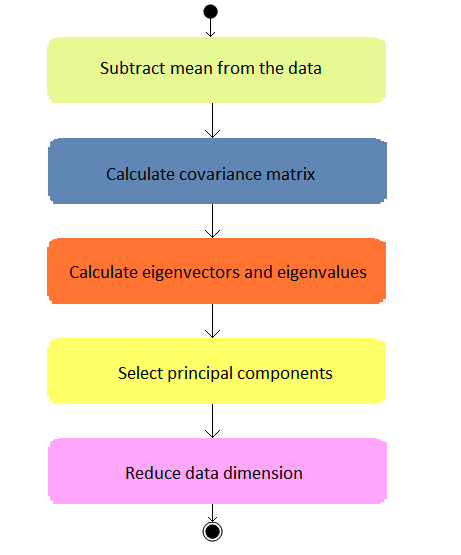